<a href="https://colab.research.google.com/github/SKS200/sks.github.io/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import os
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


                 sensor
date                   
5/15/17 5:32  36.310505
5/15/17 6:02  46.822926
5/15/17 6:32  35.738266
5/15/17 7:02  30.102343
5/15/17 7:32  31.384159


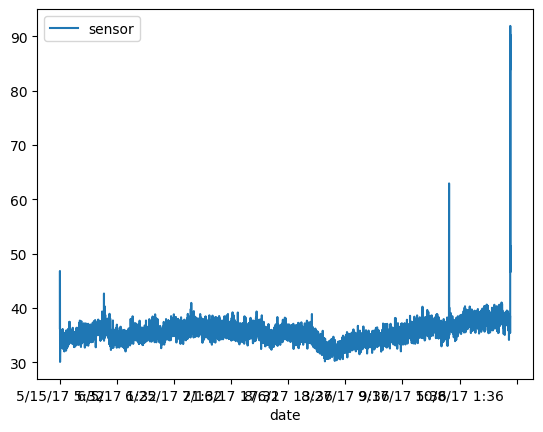

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/drive/MyDrive/Year_chunks-20230412-153817234/Year_chunks/2017/chunk7.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()
#df = pd.read_csv('/content/drive/MyDrive/Year_chunks-20230412-153817234/Year_chunks/2017/chunk7.csv',index_col= 0,parse_dates=True)
#df.index.freq='MS'

In [ ]:
#import statsmodels as sm
#import statsmodels.api as sm
##series.sort_index(inplace=True)
#decomposition = sm.tsa.seasonal_decompose(series, model ='sensor',period =)
#fig = decomposition.plot()

In [ ]:
len (series)

7898

Data Spiliting

In [ ]:
train = series.iloc[:6458]
test = series.iloc[6458:]

Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
series.head(),series.tail()

(                 sensor
 date                   
 5/15/17 5:32  36.310505
 5/15/17 6:02  46.822926
 5/15/17 6:32  35.738266
 5/15/17 7:02  30.102343
 5/15/17 7:32  31.384159,
                    sensor
 date                     
 10/26/17 16:06  51.324162
 10/26/17 16:36  49.161732
 10/26/17 17:06  50.677532
 10/26/17 17:36  51.359131
 10/26/17 18:06  48.174938)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.37128861],
       [1.        ],
       [0.33706498],
       [0.        ],
       [0.07666096],
       [0.11620833],
       [0.16457775],
       [0.18313452],
       [0.18511185],
       [0.21431609]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator (1day = 48 hours, 30 days =  30 * 48 = 1440)
n_input = 1440
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
generator
# np.shape(y)
# print(y)

Given the Array: 
[0.37128861 1.         0.33706498 ... 0.3151618  0.32276698 0.27272434]
Predict this y: 
 [[0.36444381]]


In [ ]:
np.shape(y)

(1, 1)

In [ ]:
np.shape(X)

(1, 1440, 1)

In [ ]:
X.shape

(1, 1440, 1)

In [ ]:
#We do the same thing, but now instead for 1 months = 1440 hour
n_input = 1440
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=128)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
# d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='sigmoid')
# d2=Dense(units=256,kernel_initializer="glorot_uniform", activation='sigmoid')
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
4/4 [==============================] - 88s 17s/step - loss: 0.0760
Epoch 2/10
4/4 [==============================] - 69s 20s/step - loss: 0.0076
Epoch 3/10
4/4 [==============================] - 67s 16s/step - loss: 0.0103
Epoch 4/10
4/4 [==============================] - 66s 16s/step - loss: 0.0044
Epoch 5/10
4/4 [==============================] - 71s 17s/step - loss: 0.0056
Epoch 6/10
4/4 [==============================] - 65s 19s/step - loss: 0.0047
Epoch 7/10
4/4 [==============================] - 64s 15s/step - loss: 0.0036
Epoch 8/10
4/4 [==============================] - 68s 19s/step - loss: 0.0042
Epoch 9/10
4/4 [==============================] - 65s 19s/step - loss: 0.0042
Epoch 10/10
4/4 [==============================] - 64s 15s/step - loss: 0.0039


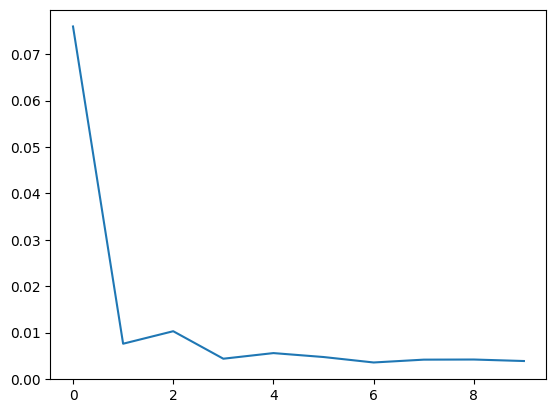

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-1440:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 2s 2s/step


array([[0.36255398]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.42011436])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,10:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [ ]:
test_predictions

[array([0.36255398], dtype=float32),
 array([0.36149493], dtype=float32),
 array([0.3592936], dtype=float32),
 array([0.35646766], dtype=float32),
 array([0.35333347], dtype=float32),
 array([0.35008287], dtype=float32),
 array([0.3468305], dtype=float32),
 array([0.34364387], dtype=float32),
 array([0.34056145], dtype=float32),
 array([0.33760402], dtype=float32),
 array([0.3347814], dtype=float32),
 array([0.33209708], dtype=float32),
 array([0.32955042], dtype=float32),
 array([0.32713845], dtype=float32),
 array([0.32485688], dtype=float32),
 array([0.3227005], dtype=float32),
 array([0.32066378], dtype=float32),
 array([0.3187414], dtype=float32),
 array([0.31692746], dtype=float32),
 array([0.3152163], dtype=float32),
 array([0.31360263], dtype=float32),
 array([0.31208128], dtype=float32),
 array([0.31064722], dtype=float32),
 array([0.3092954], dtype=float32),
 array([0.30802152], dtype=float32),
 array([0.30682105], dtype=float32),
 array([0.3056898], dtype=float32),
 array([0

In [ ]:
len(test)

1440

In [ ]:
len(train)

6458

In [ ]:
test.head(1440)

,sensor
date,
9/26/17 18:36,37.126900
9/26/17 19:06,37.104012
9/26/17 19:36,36.887833
9/26/17 20:06,36.587723
9/26/17 20:36,36.009125
...,...
10/26/17 16:06,51.324162
10/26/17 16:36,49.161732
10/26/17 17:06,50.677532


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['sensor'],test['Predictions']))
print(rmse)

7.150931742180723
